In [ ]:
# !pip install opencv-python
!pip show opencv-python

Name: opencv-python
Version: 4.1.2.30
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/skvark/opencv-python
Author: None
Author-email: None
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy
Required-by: imgaug, dopamine-rl, albumentations


In [ ]:
# 글꼴 설치전 런타임 환경 확인
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# GPU 런타임 환경 설정

# 보안 문제로 ipynb 파일 open시마다 실행
from google.colab import drive
drive.mount('/content/drive') # 마운트 이름은 자유롭게 지정 가능

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/ai_ml/cnn/mnist' # Colab
# path = '.' # Local

In [ ]:
# %autosave 0
import warnings
warnings.filterwarnings(action='ignore')

import cv2
import os
import numpy as np
from PIL import Image

from tensorflow.keras.models import load_model  # model 사용

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

%matplotlib inline

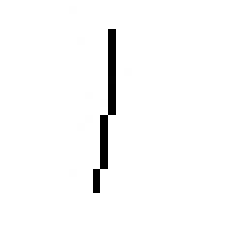

In [ ]:
# 테스트 이미지 2.jpg 읽기
image = cv2.imread(path + '/1.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap="gray")  # 이미지 출력
plt.axis("off") # 축을 출력하지 말것
plt.show()      # 이미지 출력

In [ ]:
print(type(image))
print(image.shape)
x_test = []
x_test.append(image)

y_test = 1  # Target 1을 예측하는 경우

<class 'numpy.ndarray'>
(28, 28)


In [ ]:
x_test_array = np.array(x_test)
# 3차원 배열, 1면 28행 28열
print('입력 이미지 데이터 shape: ', x_test_array.shape)

입력 이미지 데이터 shape:  (1, 28, 28)


In [ ]:
print('이미지가 배열로 변환된 데이터(0: 검은색, 255: 흰색)')
# mnist: 흰색 0, opencv: 흰색 255 색상 체계를 통일시킬 필요가 있음 ★
print(x_test_array) 

이미지가 배열로 변환된 데이터(0: 검은색, 255: 흰색)
[[[255 255 255 255 255 255 255 255 254 255 255 255 255 255 255 255 255
   255 255 255 255 255 255 255 255 255 255 255]
  [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
   255 255 255 255 255 255 255 255 255 255 255]
  [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
   255 255 255 255 255 255 255 255 255 255 255]
  [255 255 255 255 255 255 255 255 255 255 255 255 255   0 255 255 255
   255 255 255 255 255 255 255 255 255 255 255]
  [255 255 255 255 255 255 255 255 255 254 255 255 255   0 255 255 255
   255 255 255 255 255 255 255 255 255 255 255]
  [255 255 255 255 255 255 255 255 255 255 255 255 255   0 255 255 255
   255 255 255 255 255 255 255 255 255 255 255]
  [255 255 255 255 255 255 255 255 255 255 255 255 255   0 255 255 255
   255 255 255 255 255 255 255 255 255 255 255]
  [255 255 255 255 255 255 255 255 255 255 255 255 255   0 255 255 255
   255 255 255 255 255 255 255 255 255 255 255]
  [255 255 255

In [ ]:
print('이미지가 배열로 변환된 데이터(0: 흰색, 255: 검은색)')
print(255-x_test_array) # 0: 흰색, 255: 검은색
x_test_array = 255-x_test_array

이미지가 배열로 변환된 데이터(0: 흰색, 255: 검은색)
[[[  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0 255   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   1   0   0   0 255   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0 255   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0 255   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0 255   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0

In [ ]:
print('대응하는 숫자', y_test)

대응하는 숫자 1


In [ ]:
# CNN은 내부적으로 4차원의 데이터를 학습함으로 4차원으로 변경함: 면, 행, 열, 색상(1: 흑백, 3: 칼라)
x_test_array = x_test_array.reshape(1, 28, 28, 1).astype('float32') / 255.0
print('입력 이미지 데이터 shape: ', x_test_array.shape)  # 3차원 배열, 1면 28행 28열 -->  4차원 배열, 1면 28행 28열 흑백 1

입력 이미지 데이터 shape:  (1, 28, 28, 1)


In [ ]:
# model = load_model(path + '/Mnist3_cnn.h5')
model = load_model(path + '/Mnist3_cnn.h5') # Colab GPU

In [ ]:
yhat_test = model.predict(x_test_array, batch_size=1)
print(yhat_test.shape)
print(yhat_test)

(1, 10)
[[9.9213161e-05 9.8544127e-01 4.8765105e-05 9.5892865e-06 2.2881154e-03
  8.1214320e-04 1.0765292e-02 2.9984562e-04 1.9290745e-04 4.2964519e-05]]


In [ ]:
idx = np.argmax(yhat_test)  # 최대값의 index
print(idx)  # 최대값이 있는 index 산출
print('실제: {0:.0f}, 예상: {1:.0f}, 확률: {2:.1f}%'.format(y_test, idx, yhat_test[0][idx]*100))

1
실제: 1, 예상: 1, 확률: 98.5%


In [ ]:
def test(fname, y_test):
    image = cv2.imread(path + fname, cv2.IMREAD_GRAYSCALE)
    # 큰이미지 사이즈 변경, 손실 발생, 정확도 떨어짐.
    image = cv2.resize(image, (28, 28))  
    x_test = []
    x_test.append(image)
    x_test_array = np.array(x_test)
    x_test_array = 255-x_test_array
    x_test_array = x_test_array.reshape(1, 28, 28, 1).astype('float32') / 255.0
    yhat_test = model.predict(x_test_array, batch_size=1)
    idx = np.argmax(yhat_test)  # 최대값의 index

    idx = np.argmax(yhat_test)  # 최대값의 index
    print(idx)  # 최대값이 있는 index 산출
    print('실제: {0:.0f}, 예상: {1:.0f}, 확률: {2:.1f}%'.format(y_test, idx, yhat_test[0][idx]*100))


In [ ]:
test('/1.jpg', 1)
test('/1_1.jpg', 1)
test('/1_3.jpg', 1)
test('/1_4.jpg', 1)
test('/2.jpg', 2)
test('/3.jpg', 3)
test('/7.jpg', 7)

1
실제: 1, 예상: 1, 확률: 98.5%
1
실제: 1, 예상: 1, 확률: 100.0%
1
실제: 1, 예상: 1, 확률: 99.7%
1
실제: 1, 예상: 1, 확률: 100.0%
2
실제: 2, 예상: 2, 확률: 100.0%
3
실제: 3, 예상: 3, 확률: 100.0%
7
실제: 7, 예상: 7, 확률: 97.1%


In [ ]:
# 큰이미지 에러 발생 확인
# cannot reshape array of size 16384 into shape (1,28,28,1)
test('/1_2.jpg', 1)  

1
실제: 1, 예상: 1, 확률: 51.8%
